**(d) &(e)**

The followint codes implements computing the value of cost by means of back-propagation using Gradient Descent Method and monitored the values of cost and gradient.
Because we use Relu activation function, the cost finally converged monotonously.Details will be discussed in the next question.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Relu(x):
    return (np.abs(x)+x)/2

def Relu_prime(x):
    return np.where(x>0,1,0)

In [3]:
def mse(y,y_ypred):
    return ((y-y_ypred)**2).mean()

For N=5000, draw samples xi and set yi from 1 to N:

In [4]:
# initialize dataset
N = 5000
x_size = 2*N
x=np.empty(x_size).reshape(N,2)
y=[]
np.random.seed(1)
for i in range(0,N):
    for j in range(0,2):
        x[i][j]= np.random.uniform(-4*np.pi,4*np.pi)
    y.append(np.sin(np.linalg.norm(x[i]))/np.linalg.norm(x[i]))
# print(x)
# print(y)



Replace x,y as required in question (g):

In [5]:
# ## initialize dataset replaced by (g)
# N = 5000
# x_size = 2*N
# x=np.empty(x_size).reshape(N,2)
# y=[]
# np.random.seed(1)
# for i in range(0,N):
#     for j in range(0,2):
#         x[i][j]= np.random.uniform(-4*np.pi,4*np.pi)
#     y.append(np.abs(max(x[i])))
#print(x)
#print(y)

Set parameters w and d:

In [6]:
## initialize parameters

layers_size = 6
parameters = {}
weight_size = []
d=2
M=[2,5,9,5,3,1]
weight={}

np.random.seed()
for i in range(0,layers_size):
    if i==0:
        weight_size.append(d*M[0])
        weighti=(np.empty(weight_size[i]).reshape(d,M[0]))
        for j in range(0,d):
            for k in range(0,M[0]):
                weighti[j][k]=np.random.uniform(-1,1)
        weight[i]=weighti
    else:
        weight_size.append(M[i]*M[i-1])
        weighti=np.empty(weight_size[i]).reshape(M[i],M[i-1])
        for j in range(0,M[i]):
            for k in range(0,M[i-1]):
                weighti[j][k]=np.random.uniform(-1,1)
        weight[i]=weighti


for l in range(1,layers_size+1):
    
    parameters["W" + str(l)] = weight[l-1]
    parameters["b" + str(l)] = 1

print(parameters)

{'W1': array([[ 0.90404964,  0.34139011],
       [-0.15699923,  0.72902662]]), 'b1': 1, 'W2': array([[ 0.42090982, -0.36478254],
       [-0.89035921, -0.06078315],
       [ 0.8689528 , -0.12973065],
       [ 0.13442498,  0.29967095],
       [ 0.33791004,  0.63480597]]), 'b2': 1, 'W3': array([[-0.02305311,  0.4630617 ,  0.85779966,  0.40371917,  0.37152975],
       [ 0.22596616, -0.57391845, -0.46414543, -0.01330366,  0.62214031],
       [-0.81406636, -0.13838588,  0.95006721, -0.98736383,  0.90012469],
       [-0.8855041 ,  0.83146082,  0.2283929 , -0.10707711,  0.45494442],
       [ 0.84327628, -0.24504108,  0.54423135,  0.35582749, -0.0691627 ],
       [-0.5409577 , -0.64925984, -0.26451308, -0.33238182,  0.28736295],
       [-0.80486205,  0.85098961,  0.57743336,  0.54793702, -0.86075792],
       [ 0.58656377,  0.76182429, -0.70411383, -0.00401006,  0.50045496],
       [ 0.56826674, -0.72991791,  0.76036238, -0.62700698,  0.06752464]]), 'b3': 1, 'W4': array([[ 5.38910261e-01,  5.240

In [7]:
## forward propagation
def forward(x):
    store = {}
    A=x.T
    #print(x)
    for l in range(layers_size-1):
        Z=parameters["W"+str(l+1)].dot(A)+parameters["b"+str(l+1)]
        A=Relu(Z)
        #print(parameters["W"+str(l+1)])
        store["A"+str(l+1)]=A
        store["W"+str(l+1)]=parameters["W"+str(l+1)]
        store["Z"+str(l+1)]=Z
    Z=parameters["W"+str(layers_size)].dot(A)+parameters["b"+str(layers_size)] 
    #print(parameters["W"+str(layers_size)])
    #print(parameters["W6"].shape)
    #print(A.shape)
    #print(Z.shape)
    A=Relu(Z)
    #print(A)
    store["A"+str(layers_size)]=A    
    store["W"+str(layers_size)]=parameters["W"+str(layers_size)]
    store["Z"+str(layers_size)]=Z    
    #print(y)
    
    #print(cost)
    return A,store
A,store=forward(x)
#print(A)

In [8]:
def backward(X, Y, store):

    derivatives = {}

    store["A0"] = X.T

    A = store["A" + str(layers_size)]
    cost1=mse(A,y)
    dA = 2*cost1
    
    dZ = dA * Relu_prime(store["Z" + str(layers_size)])
    dW = dZ.dot(store["A" + str(layers_size - 1)].T) /N
    db = np.sum(dZ, axis=1,keepdims=True) /N
    dAPrev = store["W" + str(layers_size)].T.dot(dZ)
    
    derivatives["dW" + str(layers_size)] = dW
    derivatives["db" + str(layers_size)] = db

    for l in range(layers_size - 1, 0, -1):
        dZ = dAPrev * Relu_prime(store["Z" + str(l)])
        dW = dZ.dot(store["A" + str(l - 1)].T)/N
        db =np.sum(dZ, axis=1, keepdims=True)/N
        if l > 1:
            dAPrev = store["W" + str(l)].T.dot(dZ)

        derivatives["dW" + str(l)] = dW
        derivatives["db" + str(l)] = db

    return derivatives
backward(x,y,store)

{'dW6': array([[ 4.09015233,  6.16104227, 40.46964327]]),
 'db6': array([[6.22398878]]),
 'dW5': array([[  9.14796642,  14.48149937,   4.17565273,   6.47980223,
           3.21499109],
        [-32.29687989, -52.27144178,  -1.88326398,  -6.04495336,
          -1.75909334],
        [  2.47391999,   3.99471836,   0.2434726 ,   0.57762831,
           0.18610571]]),
 'db5': array([[ 3.04275564],
        [-4.7812441 ],
        [ 0.37935886]]),
 'dW4': array([[ 3.83522493e+01,  1.17435772e+01,  2.33664680e+01,
          1.43920481e+01,  2.73983678e+01,  1.70912574e+00,
          3.78456740e+00,  1.29275184e+01,  1.76519655e+01],
        [-2.53263882e+01, -8.40208559e+00, -1.50975111e+01,
         -1.02418131e+01, -1.76743891e+01, -1.32427268e+00,
         -2.79712744e+00, -9.65518292e+00, -1.08124374e+01],
        [ 8.11721974e+00,  5.73899301e+00,  5.04070843e+00,
          5.97789202e+00,  3.38029602e+00,  1.50368015e+00,
          5.32452584e-01,  6.10262379e+00,  2.88466222e-01],
       

In [9]:

def train(x,y,learning_rate=0.0001,n_iterations=5000):
    costs=[]
    for loop in range(n_iterations):
        A,store=forward(x)

        cost=mse(A,y)
        #print(cost)
        derivatives=backward(x,y,store)
        ## update parameters
        for l in range(1,layers_size+1):
            parameters["W"+str(l)]=parameters["W"+str(l)]-learning_rate*derivatives["dW"+str(l)]
            parameters["b"+str(l)]=parameters["b"+str(l)]-learning_rate*derivatives["db"+str(l)]
            
        #print(loop,cost)
        costs.append(cost)
        

    return A,costs


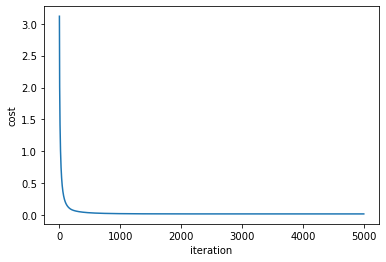

In [10]:
A,costs=train(x,y,learning_rate=0.0001,n_iterations=5000)
plt.plot(np.arange(len(costs)), costs)
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()

(f) The values of the resulting approxiamatiion and label values look not similar. It is because when we use Relu function as our activation function, the training is very "fragile", after the parameters are updated, ReLU neurons will no longer be activated, which result in the gradients finally becomes zero.

0.02032259365610576
[[0. 0. 0. ... 0. 0. 0.]]


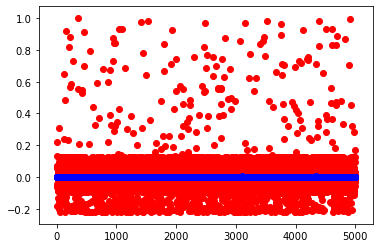

In [11]:
c=mse(A,y)
print(c)
print(A)
plt.scatter(range(N),y,color="red")
plt.scatter(range(N),A,color="blue")
plt.show()

(g) To change the network design to improve the quality of , we can work on the layers , the weight matrix, or the activation function. Here I would like to change the activation function, as discussed in (f).
If f0(x) is replaced, the quality of approxiamation will change(the cost will become larger), it is because the range of the value of f0 will become wider, while the predicted value still turns to be zeros, thus the cost certainly will become higher.